Lets look at the stellar mass distribution of BGS galaxies using the MXXL mock catalog

In [31]:
import os 
import h5py
import numpy as np 
# --- gpc_mc --- 
from gqp_mc import util as UT

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
# read in MXXL mock catalog
fmxxl = os.path.join(UT.dat_dir(), 'mxxl.bgs_r20.6.hdf5')
mxxl = h5py.File(fmxxl, 'r')

In [10]:
M_r_sun = 4.67 # Bell+(2003)

def MtoL_Bell2003(g_r): 
    # Bell+(2003) M/L ratio 
    return 10**(-0.306 + (1.097 * g_r))

def Mr_to_Mstar(Mr, g_r): 
    '''given r-band abs mag calculate M*
    '''
    M_to_L = MtoL_Bell2003(g_r)

    L_r = 10**((M_r_sun - Mr)/2.5)
    
    return M_to_L * L_r

In [6]:
mxxl['Data'].keys()

<KeysViewHDF5 ['abs_mag', 'app_mag', 'dec', 'g_r', 'galaxy_type', 'halo_mass', 'mxxl_id', 'ra', 'snap', 'z_cos', 'z_obs']>

In [7]:
ra = mxxl['Data/ra'][...]
dec = mxxl['Data/dec'][...]
z = mxxl['Data/z_obs'][...]

M_r = mxxl['Data/abs_mag'][...]
m_r = mxxl['Data/app_mag'][...]
g_r = mxxl['Data/g_r'][...]

In [13]:
print('%i galaxies' % len(ra))

41561531 galaxies


In [12]:
Mstar = Mr_to_Mstar(M_r, g_r)

Text(0, 0.5, 'Dec')

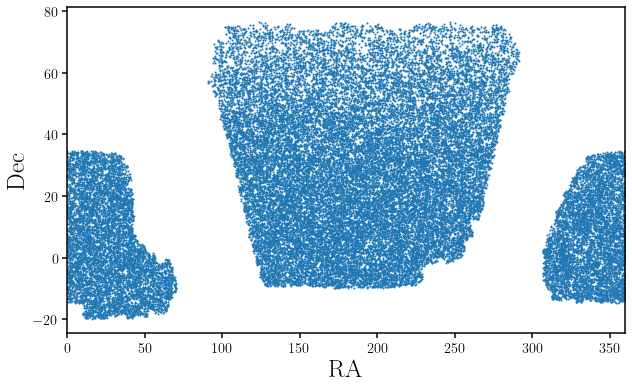

In [16]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)
sub.scatter(ra[::1000], dec[::1000], c='C0', s=1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(0., 360)
sub.set_ylabel('Dec', fontsize=25)

Text(0, 0.5, '$r$ magnitude')

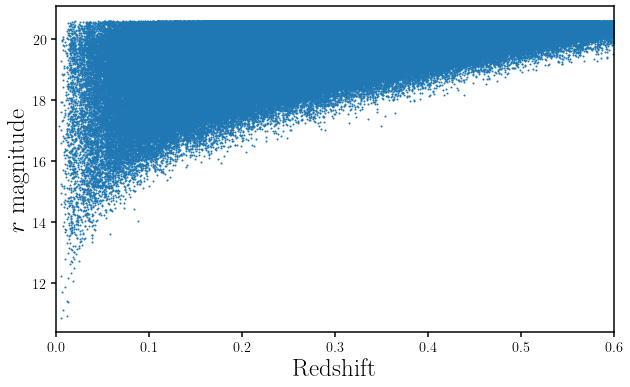

In [32]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)
sub.scatter(z[::100], m_r[::100], c='C0', s=1)
sub.set_xlabel('Redshift', fontsize=25)
sub.set_xlim(0., 0.6)
sub.set_ylabel('$r$ magnitude', fontsize=25)
#sub.set_ylim(21, 13)

In [37]:
main_sample = (m_r < 19.5)
faint_sample = (m_r < 20.)

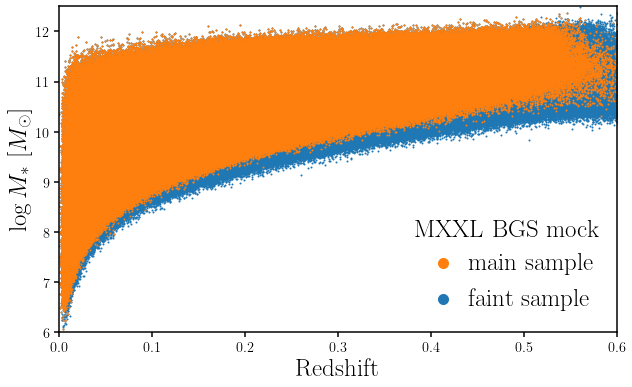

In [51]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

_faint = sub.scatter(z[faint_sample], np.log10(Mstar[faint_sample]), c='C0', s=1, rasterized=True)
_main = sub.scatter(z[main_sample], np.log10(Mstar[main_sample]), c='C1', s=1, rasterized=True)

sub.legend([_main, _faint], ['main sample', 'faint sample'], loc='lower right', fontsize=25, markerscale=10, handletextpad=0.)
sub.set_xlabel('Redshift', fontsize=25)
sub.set_xlim(0., 0.6)
sub.set_ylabel('$\log M_*$ [$M_\odot$]', fontsize=25)
sub.set_ylim(6, 12.5)
sub.text(0.97, 0.35, 'MXXL BGS mock', ha='right', va='top', transform=sub.transAxes, fontsize=25)

ffig = '/Users/chahah/projects/gqp_mc/doc/paper/figs/bgs_mstar_z.png'
fig.savefig(ffig, bbox_inches='tight')
fig.savefig(UT.fig_tex(ffig, pdf=True), bbox_inches='tight') 